In [11]:
import pandas as pd
import fbprophet as fbp 
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'fbprophet'

In [12]:
confirmUrl = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
deathUrl = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"
recoverUrl = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"

In [13]:
def get_n_melt_data(data_url,case_type):
  df = pd.read_csv(data_url)
  melted_df = df.melt(id_vars=['Province/State' , 'Country/Region' , 'Lat' , 'Long'])
  melted_df.rename(columns={"variable":"Date","value": case_type} , inplace=True)
  return melted_df

def merge_data(confirmed_df , recovered_df , deaths_df):
  new_df = confirmed_df.join(recovered_df['Recovered']).join(deaths_df['Deaths'])
  return new_df


In [14]:
confirmed_df = get_n_melt_data(confirmUrl , "Confirmed")
recovered_df = get_n_melt_data(recoverUrl , "Recovered")
deaths_df = get_n_melt_data(deathUrl , "Deaths")

In [15]:
df = merge_data(confirmed_df , recovered_df , deaths_df)

In [16]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0


In [17]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [27]:
df_per_day = df.groupby("Date")[["Country/Region",'Confirmed','Recovered', 'Deaths']].sum()

In [28]:
df_per_day

,Confirmed,Recovered,Deaths
Date,,,
1/22/20,555,28.0,17
1/23/20,654,30.0,18
1/24/20,941,38.0,26
1/25/20,1434,83.0,42
1/26/20,2118,63.0,56
...,...,...,...
4/5/20,1249484,368032.0,69374
4/6/20,1321131,447934.0,74565
4/7/20,1396092,408149.0,81937


In [20]:
df_per_day.describe()

,Confirmed,Recovered,Deaths
count,9.100000e+01,91.000000,91.000000
mean,5.180653e+05,129323.340659,30124.142857
std,7.344761e+05,183567.605916,48721.436135
min,5.550000e+02,0.000000,17.000000
25%,6.362650e+04,4315.500000,1447.000000
50%,1.058470e+05,57464.000000,3558.000000
75%,7.512645e+05,158798.000000,35753.500000
max,2.561043e+06,760295.000000,176983.000000


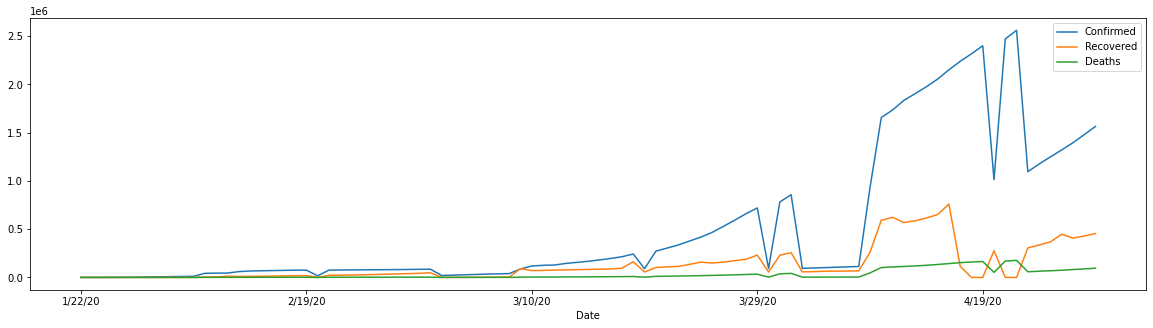

In [21]:
df_per_day.plot(kind='line' , figsize=(20,5))

In [54]:
dir(fbp)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [ ]:
from fbprophet import Prophet

m = Prophet()

In [56]:
m.add_seasonality(name="monthly",period=30.5,fourier_order=5)

In [ ]:
global_cases = df_per_day.reset_index()

In [58]:
global_cases.head()

,Date,Confirmed,Recovered,Deaths
0,1/22/20,555,28.0,17
1,1/23/20,654,30.0,18
2,1/24/20,941,38.0,26
3,1/25/20,1434,83.0,42
4,1/26/20,2118,63.0,56


In [ ]:
confirmed_cases = global_cases[["Date","Confirmed"]]
recovered_cases = global_cases[["Date","Recovered"]]
death_cases = global_cases[["Date","Deaths"]]

In [64]:
confirmed_cases.shape

(90, 2)

In [65]:
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"} , inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train = confirmed_cases[:45]
test = confirmed_cases[45:]

In [67]:
train.head()

,ds,y
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [68]:
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_date = m.make_future_dataframe(periods=30)

In [79]:
future_date

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
70,2020-04-09
71,2020-04-10
72,2020-04-11
73,2020-04-12


In [ ]:
predication = m.predict(future_date)

In [81]:
predication

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-2321.179282,-2468.615267,2655.741184,-2321.179282,-2321.179282,2495.707569,2495.707569,2495.707569,4678.283496,4678.283496,4678.283496,-2182.575927,-2182.575927,-2182.575927,0.0,0.0,0.0,174.528287
1,2020-01-23,110.707653,-2717.744598,2344.742154,110.707653,110.707653,-222.717113,-222.717113,-222.717113,1123.606552,1123.606552,1123.606552,-1346.323665,-1346.323665,-1346.323665,0.0,0.0,0.0,-112.009460
2,2020-01-24,2542.594588,-838.803550,4117.182035,2542.594588,2542.594588,-940.516876,-940.516876,-940.516876,-1617.968387,-1617.968387,-1617.968387,677.451511,677.451511,677.451511,0.0,0.0,0.0,1602.077712
3,2020-01-25,4974.481523,553.161028,5657.984390,4974.481523,4974.481523,-1749.848576,-1749.848576,-1749.848576,-3373.735895,-3373.735895,-3373.735895,1623.887319,1623.887319,1623.887319,0.0,0.0,0.0,3224.632947
4,2020-01-26,7406.368460,1575.975941,6708.967503,7406.368460,7406.368460,-3259.129784,-3259.129784,-3259.129784,-4579.032566,-4579.032566,-4579.032566,1319.902782,1319.902782,1319.902782,0.0,0.0,0.0,4147.238676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2020-04-09,225594.383729,215738.700563,223517.655212,222513.520541,228410.442717,-6009.173271,-6009.173271,-6009.173271,-4662.849606,-4662.849606,-4662.849606,-1346.323665,-1346.323665,-1346.323665,0.0,0.0,0.0,219585.210458
71,2020-04-10,228820.882395,219715.974969,227936.479037,225545.749477,231749.003607,-4889.702989,-4889.702989,-4889.702989,-5567.154500,-5567.154500,-5567.154500,677.451511,677.451511,677.451511,0.0,0.0,0.0,223931.179406
72,2020-04-11,232047.381061,225378.637600,233649.866515,228581.214392,235133.475934,-2321.910151,-2321.910151,-2321.910151,-3945.797470,-3945.797470,-3945.797470,1623.887319,1623.887319,1623.887319,0.0,0.0,0.0,229725.470910
73,2020-04-12,235273.879727,232497.534994,240902.057915,231647.652382,238552.960487,1569.033110,1569.033110,1569.033110,249.130328,249.130328,249.130328,1319.902782,1319.902782,1319.902782,0.0,0.0,0.0,236842.912836


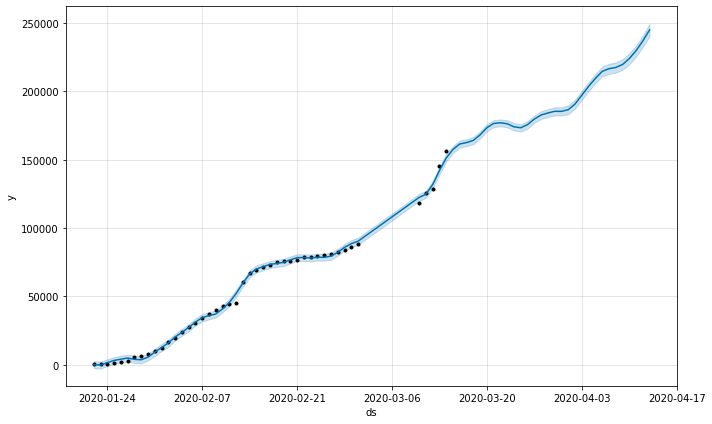

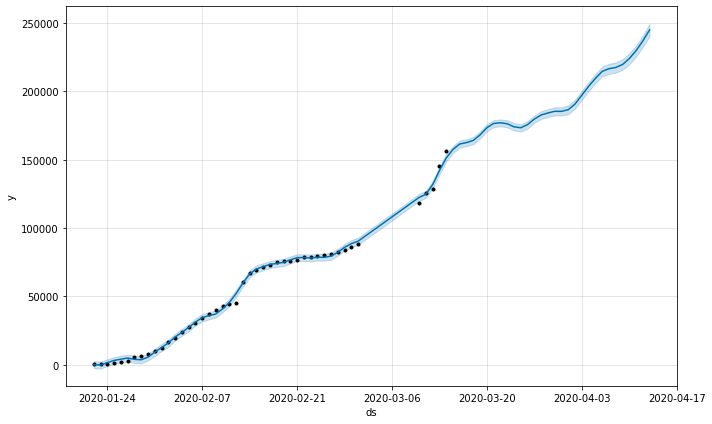

In [82]:
m.plot(predication)

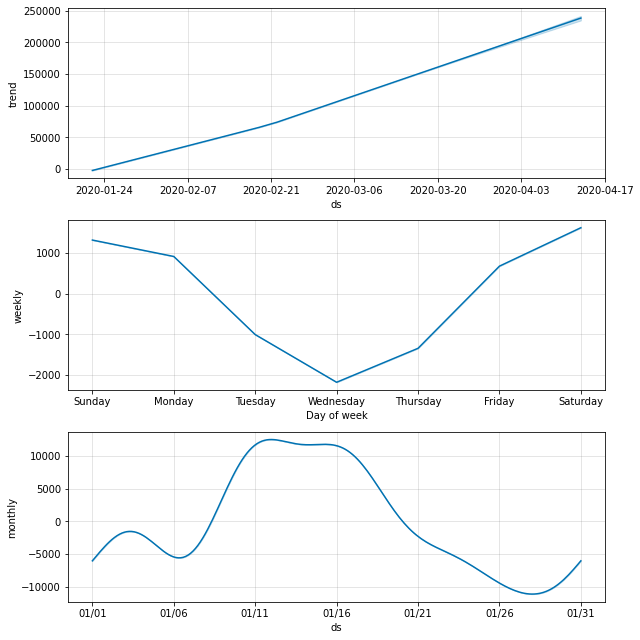

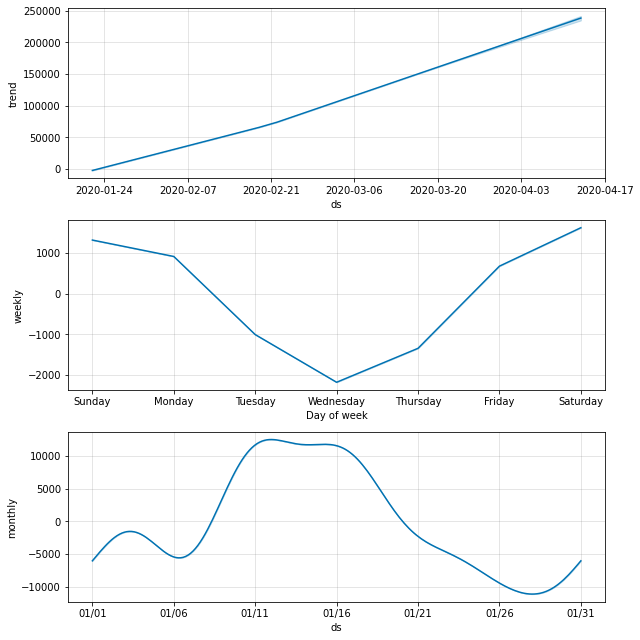

In [83]:
m.plot_components(predication)

In [84]:
test.head()

,ds,y,dates
45,3/15/20,167454,2020-03-15
46,3/16/20,181574,2020-03-16
47,3/17/20,197102,2020-03-17
48,3/18/20,214821,2020-03-18
49,3/19/20,242570,2020-03-19


In [85]:
test["dates"] = pd.to_datetime(test["ds"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
test

,ds,y,dates
45,3/15/20,167454,2020-03-15
46,3/16/20,181574,2020-03-16
47,3/17/20,197102,2020-03-17
48,3/18/20,214821,2020-03-18
49,3/19/20,242570,2020-03-19
50,3/2/20,90306,2020-03-02
51,3/20/20,272208,2020-03-20
52,3/21/20,304507,2020-03-21
53,3/22/20,336953,2020-03-22
54,3/23/20,378231,2020-03-23


In [ ]:
test = test.set_index("dates")

In [88]:
test

,ds,y
dates,,
2020-03-15,3/15/20,167454
2020-03-16,3/16/20,181574
2020-03-17,3/17/20,197102
2020-03-18,3/18/20,214821
2020-03-19,3/19/20,242570
2020-03-02,3/2/20,90306
2020-03-20,3/20/20,272208
2020-03-21,3/21/20,304507
2020-03-22,3/22/20,336953


In [ ]:
test = test["y"]

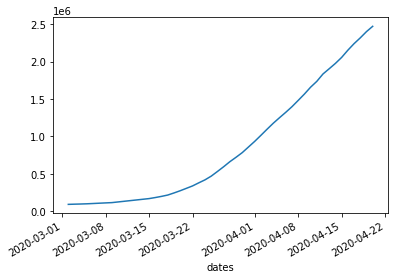

In [90]:
test.plot()

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

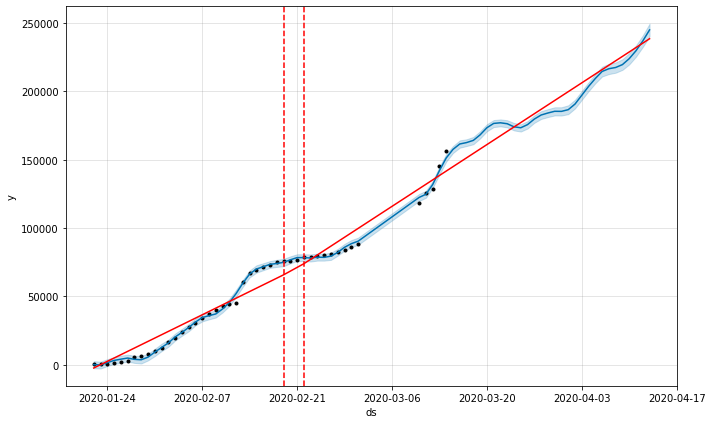

In [93]:
fig = m.plot(predication)
c = add_changepoints_to_plot(fig.gca(),m,predication)